In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as numpy
from statistics import mean

In [109]:
df = pd.read_csv('../mcs7/dfSDQ_atyp_UMAP_3clusters_MCS7.csv')
df_factors = df[['EMO', 'COND', 'HYPER', 'PEER', 'SOC']]
df_factors

,Unnamed: 0,emotion,conduct,hyper,peer,soc,MCSID,age,gender,group,EMO,COND,HYPER,PEER,SOC
0,0,0.623071,3.388755,1.337309,2.101052,0.759917,M26490Y,17.5,Male,0.0,5.0,8.0,7.0,7.0,4.0
1,1,1.827135,3.388755,2.531990,1.054498,1.227285,M12242M,17.7,Female,2.0,8.0,8.0,10.0,5.0,5.0
2,2,0.221716,-1.081517,-1.052052,-1.038611,-0.642188,M27447Z,17.4,Female,0.0,4.0,0.0,1.0,1.0,1.0
3,3,-1.383703,-1.081517,-0.653825,-1.561888,1.227285,M19758Q,17.8,Male,2.0,0.0,0.0,2.0,0.0,5.0
4,4,-0.982348,-0.522733,-1.450279,0.531221,-1.109556,M32681S,17.5,Female,1.0,1.0,1.0,0.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9186,9186,NaN,NaN,NaN,NaN,NaN,M16887L,16.9,Male,4.0,0.0,0.0,2.0,0.0,0.0
9187,9187,NaN,NaN,NaN,NaN,NaN,M24709Q,16.9,Female,4.0,0.0,0.0,0.0,0.0,0.0
9188,9188,NaN,NaN,NaN,NaN,NaN,M32715K,17.1,Female,4.0,0.0,0.0,0.0,2.0,0.0
9189,9189,NaN,NaN,NaN,NaN,NaN,M30647G,16.8,Female,4.0,0.0,0.0,1.0,1.0,1.0


In [110]:
# zscoring
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_z= ss.fit_transform(df_factors)
df_z = pd.DataFrame(df_z, columns = ['emotion', 'conduct', 'hyperactivity','peer problems', 'antisocial'])
demo = df[['MCSID','age','gender', 'group']]
df_z = df_z.join(demo)
df_z

,emotion,conduct,hyperactivity,peer problems,antisocial,MCSID,age,gender,group
0,1.342561,4.864040,2.026001,2.996590,1.384345,M26490Y,17.5,Male,0.0
1,2.695129,4.864040,3.367183,1.855936,1.951018,M12242M,17.7,Female,2.0
2,0.891705,-0.811304,-0.656363,-0.425372,-0.315675,M27447Z,17.4,Female,0.0
3,-0.911719,-0.811304,-0.209303,-0.995699,1.951018,M19758Q,17.8,Male,2.0
4,-0.460863,-0.101886,-1.103424,1.285609,-0.882348,M32681S,17.5,Female,1.0
...,...,...,...,...,...,...,...,...,...
9186,-0.911719,-0.811304,-0.209303,-0.995699,-0.882348,M16887L,16.9,Male,4.0
9187,-0.911719,-0.811304,-1.103424,-0.995699,-0.882348,M24709Q,16.9,Female,4.0
9188,-0.911719,-0.811304,-1.103424,0.144955,-0.882348,M32715K,17.1,Female,4.0
9189,-0.911719,-0.811304,-0.656363,-0.425372,-0.315675,M30647G,16.8,Female,4.0


In [111]:
df_z.to_csv("WholeSampleZscore_MCS7.csv", index = None )

In [79]:
#df_z = pd.read_csv('WholeSampleZscore_MCS6.csv')

In [112]:
X_np = df_z.iloc[:,0:5].to_numpy()

In [113]:
labels = df_z['group'].to_numpy()

In [114]:
# cluster 1
profileCluster1= []
indexCluster1 = numpy.where(labels == 0)[0]
for n_factors in range(5):
    test = X_np[:,n_factors]
    profileCluster1.append(mean(test[indexCluster1]))
print(len(indexCluster1))
profileCluster1

1134


[1.382716556457261,
 0.7708109747443775,
 0.3560278994543213,
 0.15853447216458175,
 0.035122936062700366]

In [115]:
# cluster 2
profileCluster2= []
indexCluster2 = numpy.where(labels == 1)[0]
for n_factors in range(5):
    test = X_np[:,n_factors]
    profileCluster2.append(mean(test[indexCluster2]))
print(len(indexCluster2))
profileCluster2

1285


[0.8731093407577151,
 -0.1869054668405819,
 0.01579311466478911,
 1.4875537493214235,
 -0.15868207175785792]

In [116]:
# cluster 3
profileCluster3= []
indexCluster3 = numpy.where(labels == 2)[0]
for n_factors in range(5):
    test = X_np[:,n_factors]
    profileCluster3.append(mean(test[indexCluster3]))
print(len(indexCluster3))
profileCluster3

1736


[-0.04610667581212826,
 0.8645736536199391,
 0.9588235014222349,
 0.4268334462694488,
 1.1199411141420939]

In [ ]:
# cluster 4
profileCluster4= []
indexCluster4 = numpy.where(labels == 3)[0]
for n_factors in range(5):
    test = X_np[:,n_factors]
    index = numpy.where(labels == 3)[0] # cluster 1 indexes 
    profileCluster4.append(mean(test[index]))
print(len(indexCluster4))
profileCluster4    

In [118]:
# cluster 5
profileCluster5= []
indexCluster5 = numpy.where(labels == 4)[0]
for n_factors in range(5):
    test = X_np[:,n_factors]
    index = numpy.where(labels == 4)[0] # cluster 1 indexes 
    profileCluster5.append(mean(test[index]))
print(len(indexCluster5))
profileCluster5

5036


[-0.5182495807558266,
 -0.42391302286620136,
 -0.41472346878364846,
 -0.5624041942089809,
 -0.3534830662106691]

In [72]:
# cluster 6
profileCluster6= []
indexCluster6 = numpy.where(labels == 5)[0]
for n_factors in range(5):
    test = X_np[:,n_factors]
    index = numpy.where(labels == 5)[0] # cluster 1 indexes 
    profileCluster6.append(mean(test[index]))
print(len(indexCluster6))
profileCluster6

7339


[-0.46799841380252194,
 -0.47259492236236916,
 -0.4665062108977896,
 -0.47031699455334375,
 -0.2906686630599834]

## access colours colorsmap (here viridis)

In [78]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
viridis = cm.get_cmap('viridis', 4)
print('viridis.colors', viridis.colors)

viridis.colors [[0.267004 0.004874 0.329415 1.      ]
 [0.190631 0.407061 0.556089 1.      ]
 [0.20803  0.718701 0.472873 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


# Radar plots

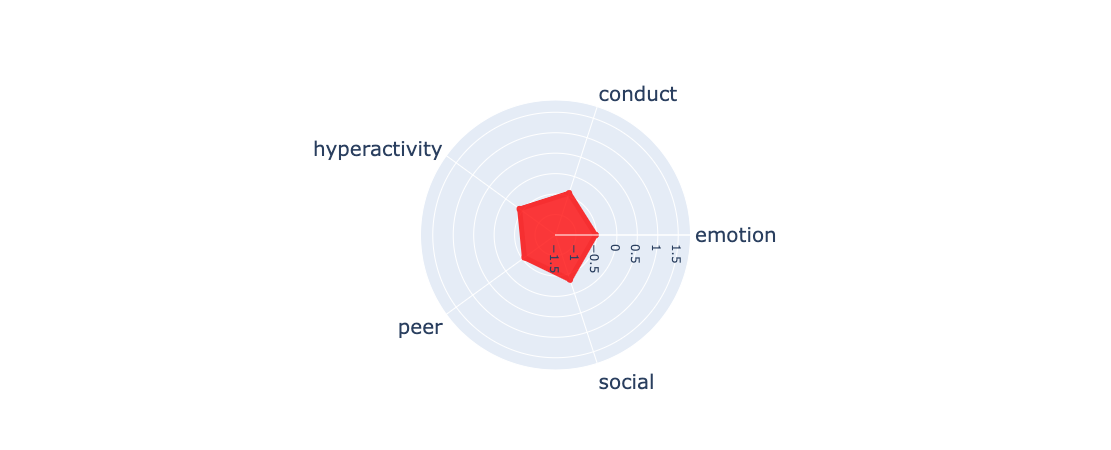

In [119]:
import plotly.graph_objects as go
from matplotlib import cm

categories = ['emotion', 'conduct', 'hyperactivity','peer', 'social']
categories.append(categories[0])

profileClusterTypical = profileCluster6 #replace by profileCluster corresponding to your typical group
profileClusterTypical.append(profileCluster6[0])

fig = go.Figure()
fig.add_trace(go.Scatterpolar(
      r=profileClusterTypical,
      theta=categories,
      fill='toself',
      fillcolor = 'rgba'+ str((255,10,10,1)), 
    #fillcolor = 'green',
    opacity = 0.8,
    line=dict(color='rgba'+ str((250,0,0,1)), width=5),
    name='No problems'
))

fig.update_layout(
  paper_bgcolor='white',
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-1.5, 1.8]),
        angularaxis = dict(tickfont_size = 20)
        
    ),
  showlegend=False
)

fig.show()

fig.write_image("typical_MCS7.svg")

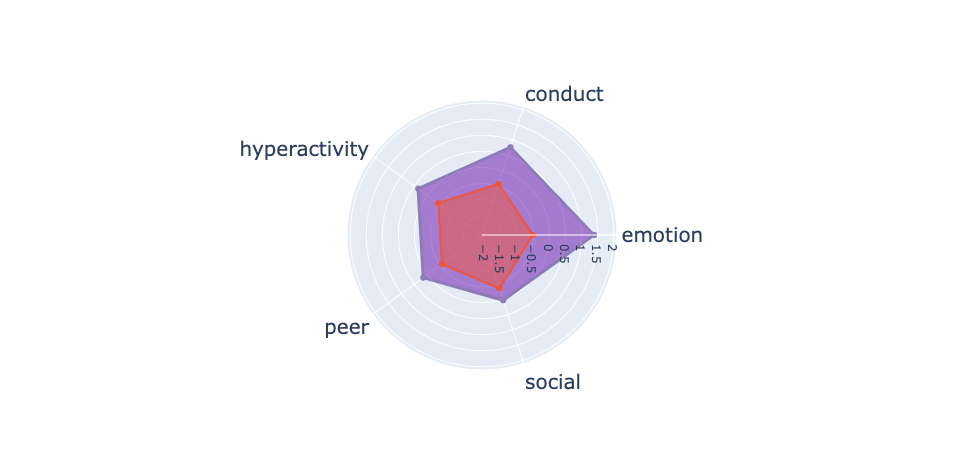

In [121]:
import plotly.graph_objects as go
from matplotlib import cm

categories = ['emotion', 'conduct', 'hyperactivity','peer', 'social']
categories.append(categories[0])
profileCluster1bis = profileCluster1
profileCluster1bis.append(profileCluster1[0])
profileClusterTypical = profileCluster6
profileClusterTypical.append(profileCluster6[0])

fig = go.Figure()


fig.add_trace(go.Scatterpolar(
      r=profileCluster1bis,
      theta=categories,
      fill='toself',
      fillcolor = 'rgba'+ str((100,10,170,1)), #purple: cluster 1 in viridis,
    #fillcolor = 'green',
    opacity = 0.5,
    line=dict(color='rgba'+ str((50,10,120,1)), width=3),
    
))

fig.add_trace(go.Scatterpolar(
      r=profileClusterTypical,
      theta=categories,
    
      fill='toself',
      
))


fig.update_layout(
  paper_bgcolor='white',
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2.1, 2.1]),
        
         angularaxis = dict(tickfont_size = 20)
    ),
  showlegend=False
)

fig.show()

fig.write_image("cluster1_MCS7_emo_conduct.svg")


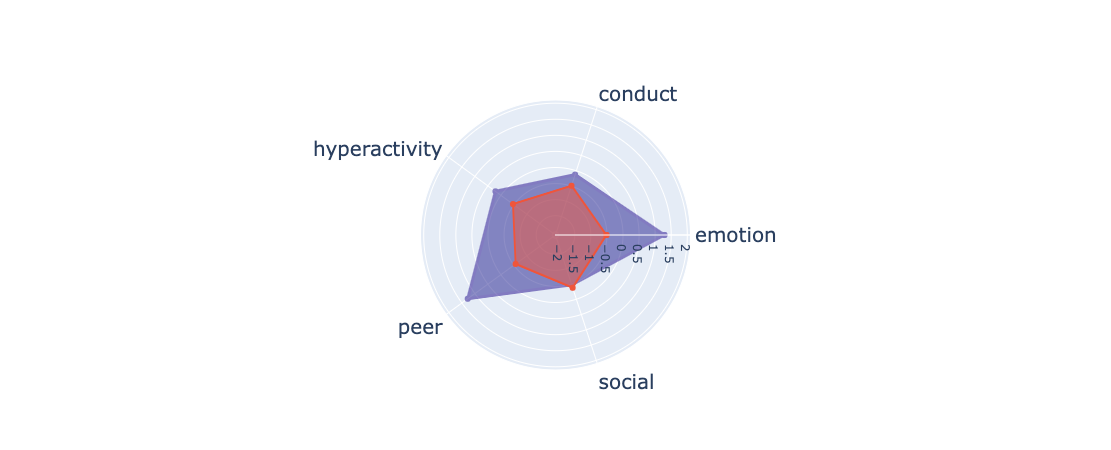

In [105]:
import plotly.graph_objects as go
from matplotlib import cm

categories = ['emotion', 'conduct', 'hyperactivity','peer', 'social']
categories.append(categories[0])
profileCluster3bis = profileCluster2
profileCluster3bis.append(profileCluster2[0])
profileClusterTypical = profileCluster6
profileClusterTypical.append(profileCluster6[0])

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=profileCluster3bis,
      theta=categories,
      fill='toself',
      fillcolor = 'rgba'+ str((30,28,140,1)),
    #fillcolor = 'green',
    opacity = 0.5,
    line=dict(color='rgba'+ str((30,10,140,1)), width=3),
    
))

fig.add_trace(go.Scatterpolar(
      r=profileClusterTypical,
      theta=categories,
      fill='toself',
      
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2.1, 2.1],
        
    ),
      angularaxis = dict(tickfont_size = 20)
  
  ),
  showlegend=False
)

#plt.savefig('clustersProfiles.png')
fig.show()
fig.write_image("cluster2_MCS6_peer_emotion.svg")

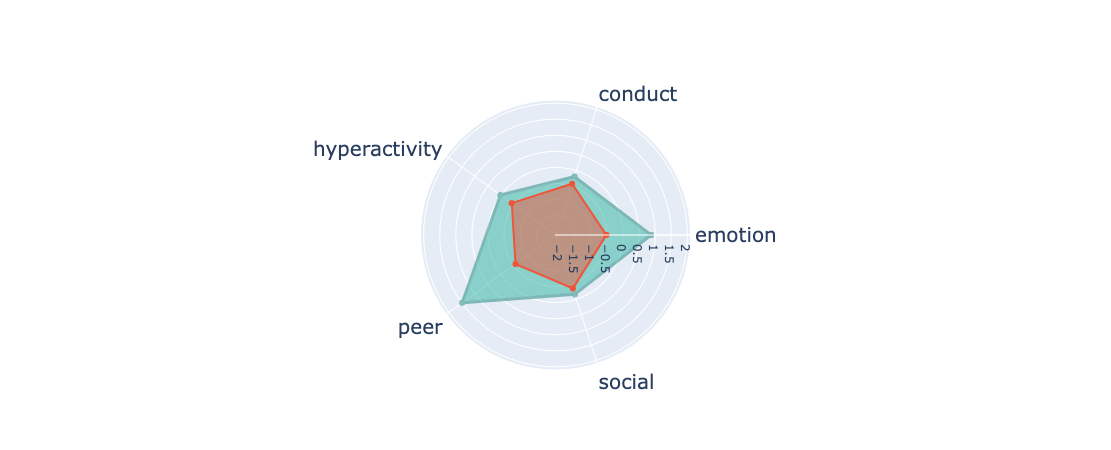

In [122]:
import plotly.graph_objects as go
from matplotlib import cm

categories = ['emotion', 'conduct', 'hyperactivity','peer', 'social']
categories.append(categories[0])
profileCluster2bis = profileCluster2
profileCluster2bis.append(profileCluster2[0])
profileClusterTypical = profileCluster6
profileClusterTypical.append(profileCluster6[0])

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=profileCluster2bis,
      theta=categories,
      fill='toself',
      fillcolor = 'rgba'+ str((44,177,158,1)),
    #fillcolor = 'rgba'+ str((0.229739, 0.322361, 0.545706, 1.)),
    #fillcolor = 'green',
    opacity = 0.5,
    line=dict(color='rgba'+ str((20,130,120,1)), width=3),
    
))

fig.add_trace(go.Scatterpolar(
      r=profileClusterTypical,
      theta=categories,
      fill='toself',
      
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2.1, 2.1]
    ),
   angularaxis = dict(tickfont_size = 20)
  
  ),
  showlegend=False
)

#plt.savefig('clustersProfiles.png')
fig.show()
fig.write_image("cluster2_MCS7_peeremotion.svg")

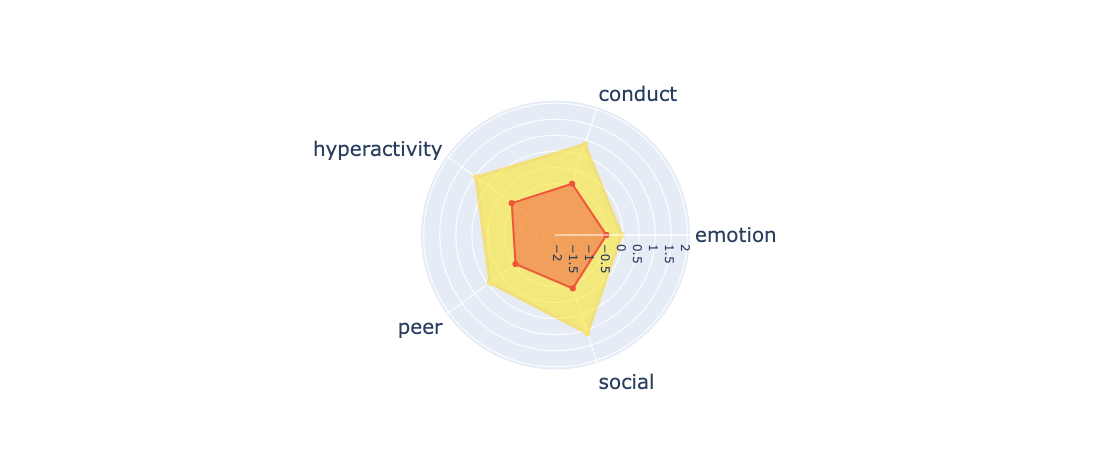

In [124]:
import plotly.graph_objects as go
from matplotlib import cm

categories = ['emotion', 'conduct', 'hyperactivity','peer', 'social']
categories.append(categories[0])
profileCluster3bis = profileCluster3
profileCluster3bis.append(profileCluster3[0])
profileClusterTypical = profileCluster6
profileClusterTypical.append(profileCluster6[0])

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=profileCluster3bis,
      theta=categories,
      fill='toself',
      fillcolor = 'rgba'+ str((255,228,0,1)),
    #fillcolor = 'green',
    opacity = 0.5,
    line=dict(color='rgba'+ str((255,210,0,1)), width=3),
    
))

fig.add_trace(go.Scatterpolar(
      r=profileClusterTypical,
      theta=categories,
      fill='toself',
     
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2.1, 2.1]),
      angularaxis = dict(tickfont_size = 20)
        #tickfont_size = 18,
        #angularaxis_linewidth = 20
        
        
    ),
  showlegend=False
)



#plt.savefig('clustersProfiles.png')
fig.show()
fig.write_image("cluster5_MCS7_socialAll.svg")

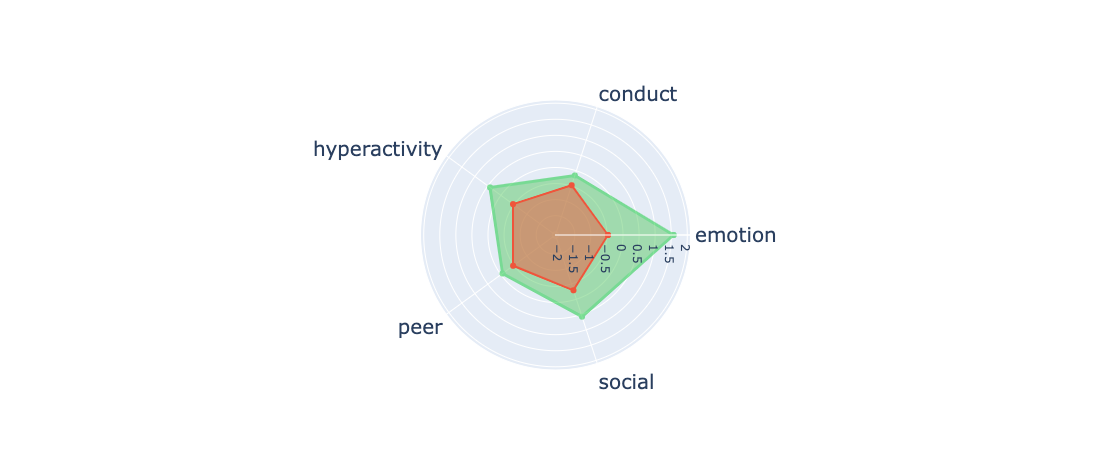

In [76]:
import plotly.graph_objects as go
from matplotlib import cm

categories = ['emotion', 'conduct', 'hyperactivity','peer', 'social']
categories.append(categories[0])
profileCluster3bis = profileCluster4
profileCluster3bis.append(profileCluster4[0])
profileClusterTypical = profileCluster6
profileClusterTypical.append(profileCluster6[0])

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=profileCluster3bis,
      theta=categories,
      fill='toself',
      fillcolor = 'rgba'+ str((90,200,101,1)),
    #fillcolor = 'green',
    opacity = 0.5,
    line=dict(color='rgba'+ str((10,200,50,1)), width=3),
    
))

fig.add_trace(go.Scatterpolar(
      r=profileClusterTypical,
      theta=categories,
      fill='toself',
      
))


fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-2.1, 2.1]),
        angularaxis = dict(tickfont_size = 20)
        
    ),
  showlegend=False
)

#plt.savefig('clustersProfiles.png')
fig.show()
fig.write_image("cluster4_MCS5_emotion.svg")